In [1]:
import pyqsp
from pyqsp.LPoly import *
from pyqsp.gadgets import *
import jax
import jax.numpy as jnp
import numpy as np
from tqdm.notebook import tqdm
from scipy.interpolate import approximate_taylor_polynomial
from matplotlib import pyplot as plt
import copy

np.set_printoptions(linewidth=100000)

In [49]:
Xi = [np.array([0, 0])]
S = [[0]]
G = AtomicGadget(Xi, S, label="G")

G_ext = ExtractionGadget(32, "G_ext")
G_int = G.interlink(G_ext, [(('G', 0), ('G_ext', 0), None)])

In [70]:
fn = lambda x, phi : (1j * np.kron(np.array([[0, 1], [1, 0]]), np.eye(2)) @ G_int.get_qsp_unitary(("G_ext", 0), rot={('G', 0):phi})({('G', 0) : x}))[0][0]

  0%|          | 0/50 [00:00<?, ?it/s]

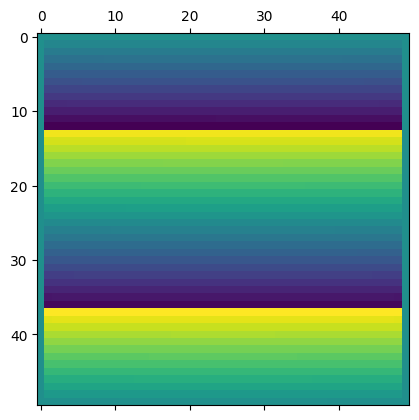

In [75]:
X = np.linspace(-1, 1, 50)
Phi = np.linspace(-np.pi, np.pi, 50)

plt.matshow([[np.angle(fn(x, phi)) for x in X] for phi in tqdm(Phi)])

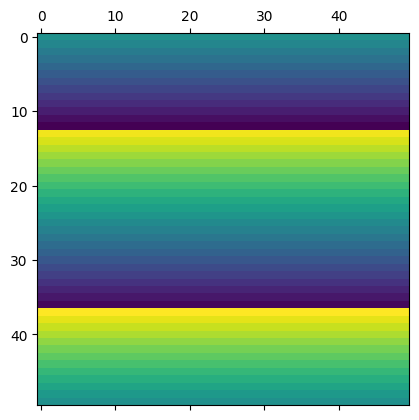

In [76]:
plt.matshow([[np.angle(np.exp(-2 * phi * 1j)) for _ in X] for phi in Phi])